In [38]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

 
log_file_pynq= './r_datos/logs_pynq_debug_20230106_test.log'

EVENT_DANGPOS    = "DANGPOS"  
EVENT_DROWSINESS = 'DROWSINESS'
EVENT_DTBLINK    = "DTBLINK"
EVENT_DTYAWN     = "DTYAWN"

event_df = pd.DataFrame()
ear_df   = pd.DataFrame()
mar_df   = pd.DataFrame()
elapse_frame = pd.DataFrame()
with open(log_file_pynq) as archivo:
    lines = archivo.readlines()

for linea in lines:
    #print(linea)
    dt = linea.split()

    tt = dt [1]

    if 'EAR:' in linea:
        dd = dt [4].split(',')
        ##print(dd)
        Blinks  = dd [1].split(':')[1]
        Counter = dd [2].split(':')[1]
        ear     = dd [3].split(':')[1]
 
        
        nueva_fila = {'Time': dt [1].split(',')[0],'Blinks':Blinks, 'Counter':Counter, 'ear':ear}
 
        ear_df = ear_df.append(nueva_fila, ignore_index=True)
    elif 'MAR:' in linea:
        dd = dt [4].split(',')
        #print(dd)
        Yawning  = dd [1].split(':')[1]
        Counter = dd [2].split(':')[1]
        mar     = dd [3].split(':')[1]
        #print(dd)
 
        nueva_fila = {'Time': dt [1].split(',')[0],'Yawning':Yawning, 'Counter':Counter, 'mar':mar}
    
        mar_df = mar_df.append(nueva_fila, ignore_index=True)
 
    elif EVENT_DANGPOS in linea:
        nueva_fila = {'Event':EVENT_DANGPOS, 'Time':dt [1], 'BLINK':0, 'Yawn':0}
        event_df = event_df.append(nueva_fila, ignore_index=True)
    elif 'event:SLEEP' in linea:
        nueva_fila = {'Event':EVENT_DROWSINESS, 'Time': dt [1].split(',')[0], 'BLINK':dt [5].split(',')[0].split(':') [1], 'Yawn':dt [5].split(',')[1].split(':') [1]}
        event_df = event_df.append(nueva_fila, ignore_index=True)
    elif 'event:BLINK' in linea:
        nueva_fila = {'Event':EVENT_DTBLINK, 'Time': dt [1].split(',')[0], 'BLINK':dt [4].split(',')[1].split(':') [1], 'Yawn':dt [4].split(',')[2].split(':') [1]}
        event_df = event_df.append(nueva_fila, ignore_index=True)
    elif  'event:YAWN' in linea:
        nueva_fila = {'Event':EVENT_DTYAWN, 'Time': dt [1].split(',')[0], 'BLINK':dt [4].split(',')[1].split(':') [1], 'Yawn':dt [4].split(',')[2].split(':') [1]}
        event_df = event_df.append(nueva_fila, ignore_index=True)
    elif 'Elapse' in linea:
        dd = linea.split ()
        nueva_fila = {'Time':dd[1], 'Elapse':dd [6] }
        elapse_frame = elapse_frame.append(nueva_fila, ignore_index=True)

In [39]:
event_df['BLINK'] = event_df['BLINK'].astype(int)
event_df['Yawn'] = event_df['Yawn'].astype(int)

ear_df ['ear'] = ear_df ['ear'].astype(float)
ear_df ['Blinks'] = ear_df['Blinks'].astype(int)
ear_df ['Counter'] = ear_df['Counter'].astype(int)

mar_df['mar'] = mar_df['mar'].astype(float)
mar_df['Yawning'] = mar_df['Yawning'].astype(int)
mar_df['Counter'] = mar_df['Counter'].astype(int) 

elapse_frame ['Elapse'] = elapse_frame ['Elapse'].astype(float)

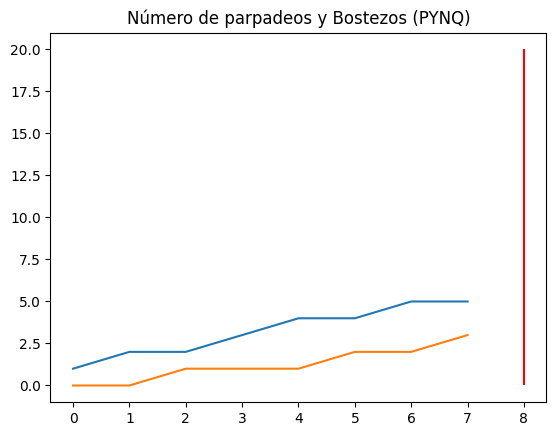

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
 

event_df.BLINK.plot() 
event_df.Yawn.plot() 
plt.title("Número de parpadeos y Bostezos (PYNQ)")
plt.vlines(x=len(event_df.Time.unique()), ymin=0, ymax=20,color='red')


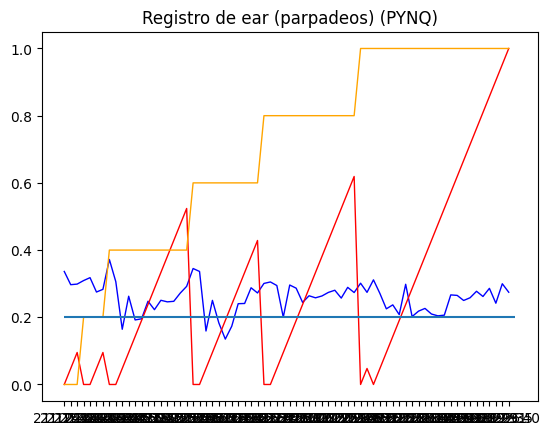

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np


ear_norm = ear_df

ear_norm['ear'] = ear_df ['ear'] 
ear_norm['Blinks'] = MinMaxScaler().fit_transform(np.array(ear_df['Blinks'] ).reshape(-1,1)) 
ear_norm['Counter'] = MinMaxScaler().fit_transform(np.array(ear_df['Counter'] ).reshape(-1,1))  

plt.plot( ear_norm.Time,ear_norm.ear,'blue',linewidth=1) #Hace la gráfica azul
plt.plot(ear_norm.Time, ear_norm.Counter, 'red',linewidth=1)
plt.plot( ear_norm.Time,ear_norm.Blinks, 'orange',linewidth=1) #Hace la gráfica azul
plt.hlines(y=0.2, xmin=0, xmax=len(ear_norm.Time.unique()))
plt.title ("Registro de ear (parpadeos) (PYNQ)")
#plt.ylim(0, 0.4)
plt.show()
 

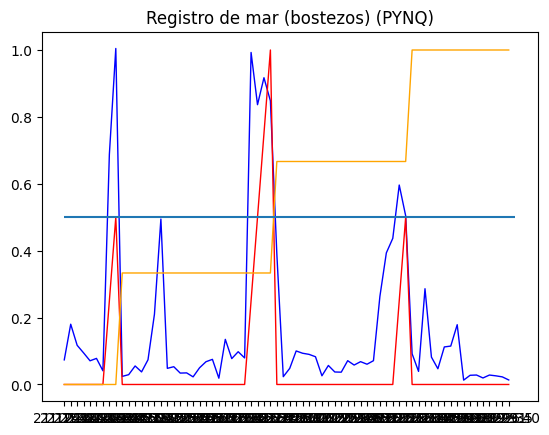

In [42]:


mar_norm = mar_df


mar_norm['mar'] = mar_df ['mar'].astype(float)
mar_norm['Yawning'] = MinMaxScaler().fit_transform(np.array(mar_df['Yawning'].astype(int)).reshape(-1,1)) 
mar_norm['Counter'] = MinMaxScaler().fit_transform(np.array(mar_df['Counter'].astype(int)).reshape(-1,1))  

plt.plot( mar_norm.Time,mar_norm.mar,'blue',linewidth=1) #Hace la gráfica azul
plt.plot(mar_norm.Time, mar_norm.Counter, 'red',linewidth=1)
plt.plot( mar_norm.Time,mar_norm.Yawning, 'orange',linewidth=1)
plt.hlines(y=0.5, xmin=0, xmax=len(mar_norm.Time.unique()))
plt.title ("Registro de mar (bostezos) (PYNQ)")
#plt.ylim(0, 0.4)
plt.show()



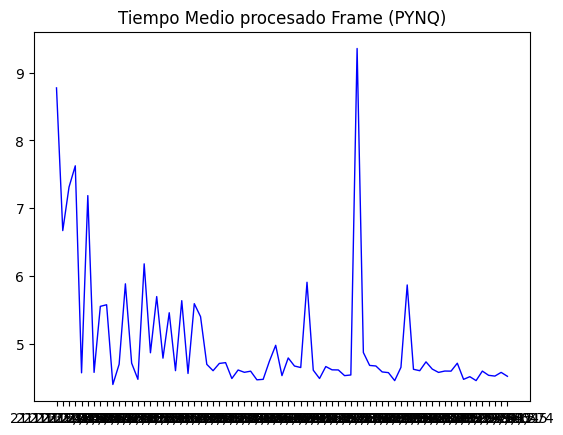

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

 
 

plt.plot(elapse_frame.Time,elapse_frame.Elapse,'blue',linewidth=1) #Hace la gráfica azul
 
plt.title ("Tiempo Medio procesado Frame (PYNQ)")
#plt.ylim(0, 0.4)
plt.show()

In [28]:
mar_norm

,Time,Yawning,Counter,mar
0,21:12:38,0.0,0.0,0.073534
1,21:24:07,0.0,0.0,0.180183
2,21:24:13,0.0,0.0,0.117174
3,21:24:18,0.0,0.0,0.094444
4,21:24:23,0.0,0.0,0.070812
...,...,...,...,...
65,21:29:22,1.0,0.0,0.019454
66,21:29:26,1.0,0.0,0.028200
67,21:29:31,1.0,0.0,0.025858
68,21:29:35,1.0,0.0,0.022729
